In [1]:
import sys 
import numpy as np
import scipy.stats
import sklearn.utils
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.mixture

In [2]:
pd.options.display.float_format = "{:.4f}".format

In [3]:
%matplotlib inline

In [4]:
sys.path.insert(0, "../")

In [5]:
from hmm import GMMHMM, plots, HMMSearch

In [6]:
hidden_states = np.asarray([0]*200 + [1] * 200)
hidden_states = hidden_states[None, :]
random_state = sklearn.utils.check_random_state(1)
observed_1 = np.concatenate([random_state.normal(5, np.sqrt(4), size=150), random_state.normal(10, 1, size=50)])
random_state.shuffle(observed_1)
observed_2 = np.concatenate([random_state.normal(0, np.sqrt(4), size=125), random_state.normal(-5, 1, size=75)])
random_state.shuffle(observed_2)
observed = np.concatenate([observed_1, observed_2])
observed_3d = observed[None, :, None]
observed_2d = observed[:, None]


/home/matthew/pkgsrc/install.20190210/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


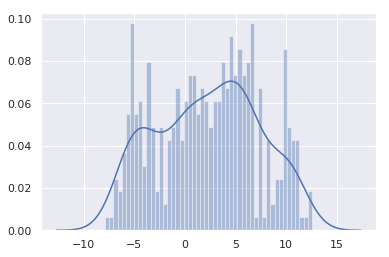

In [7]:
sns.distplot(observed, bins=50)

In [8]:
em_model = GMMHMM.GMMHMM(
    n_components=2, 
    mixture_n_components=2, 
    init_A="random",
    n_iterations=100,
    random_state=None,
    n_inits=10
)

In [9]:
em_model.fit(observed_3d)

GMMHMM(allowed_to_use_log=True, implementation='scaling', init_A='random',
    init_emissions='kmeans', init_pi='random',
    mixture_covariance_type='full', mixture_n_components=2, n_components=2,
    n_inits=10, n_iterations=100, n_jobs=-1, random_state=None, tol=1e-06,
    variance_regularization=1e-06, verbose=0)

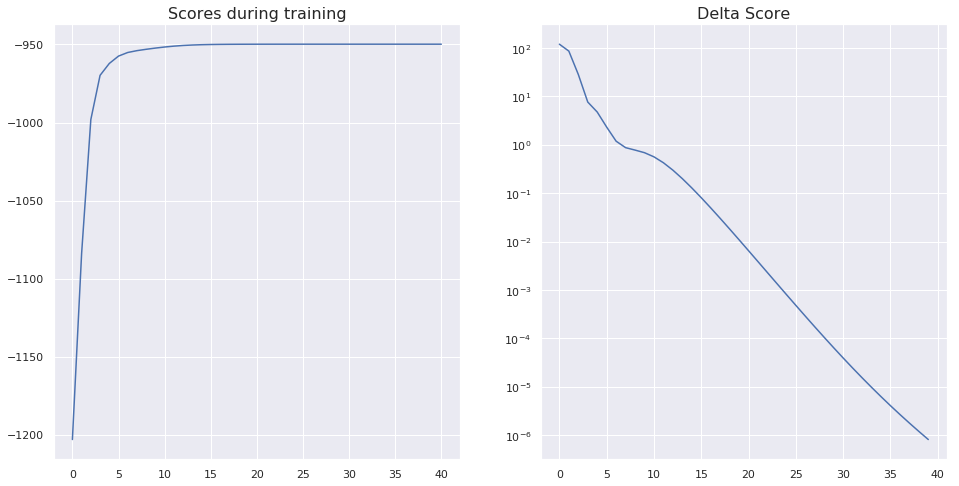

In [10]:
_ = plots.learning_plot(em_model.loglikelihoods_)

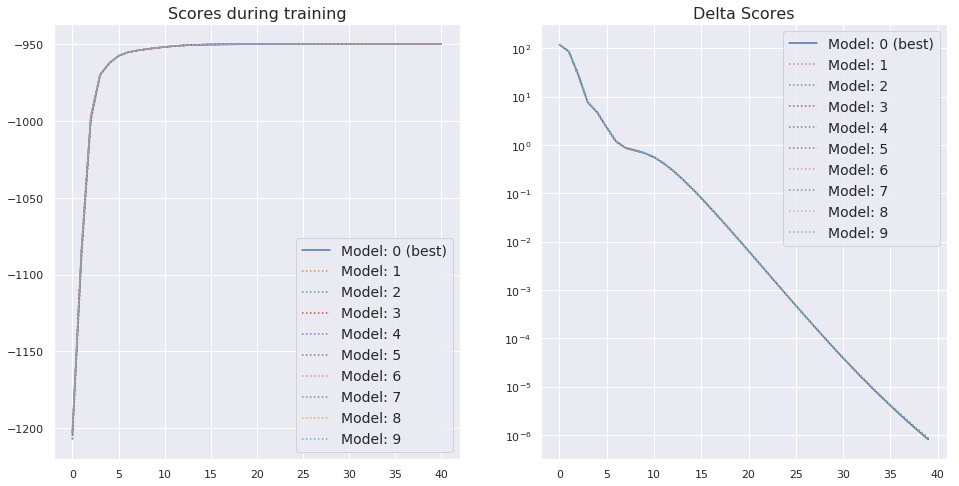

In [11]:
_ = plots.multiple_learning_plot(em_model.explored_loglikelihoods_)

In [12]:

def draw_one(weights, means, variances, random_state):
    weights = np.cumsum(weights)
    sample = rs.rand()
    for i in range(weights.shape[0]):
        if sample <= weights[i]:
            return random_state.normal(means[i], np.sqrt(variances[i]))
    else:
        assert False
observations = []
rs = sklearn.utils.check_random_state(43232)
pi = [.20, .4, .2, .2]
A = [
    [.6, .1, .1, .2],
    [.2, .4, .2, .2],
    [.3, .1, .5, .1],
    [0, .1, .2, .7]
]
weights = [
    [.25, .5, .25],
    [.5, .25, .25],
    [.5, .25, .25],
    [.25, .25, .5],
]
means = [ 
[[-10], [-12],[-9]],
[[-5], [-4], [-3]], 
[[-1.5], [0], [1.5]],
[[5], [7], [9]],
]

variances = [
    [[[.25]], [[.25]], [[.25]]],
    [[[.25]], [[.25]], [[.25]]],
    [[[.25]], [[.25]], [[.25]]],
    [[[.5]], [[.5]], [[.5]]]
]
generator = GMMHMM.GMMHMM(
    init_pi=False,
    init_A=False,
    init_mixtures=False,
    n_components=4,
    mixture_n_components=3)
generator.pi_ = pi
generator.A_ = A
generator.mixture_means_ = means
generator.mixture_weights_ = weights
generator.mixture_covariances_ = variances

observations, hidden = generator.sample(10, 200)# = generate_data_for_gmm(weights, means, variances, 10, 100)

TypeError: __init__() got an unexpected keyword argument 'init_mixtures'

In [ ]:
_ = plots.plot_hmm_states(observations[0], hidden[0])

In [ ]:

model = GMMHMM.GMMHMM(n_components=4, mixture_n_components=3, n_iterations=1000, n_inits=4)

In [ ]:
model.fit(observations)

In [ ]:
model.mixture_means_

In [ ]:
model.num_free_params()

In [ ]:
#_ = plots.multiple_learning_plot(model.explored_loglikelihoods_)
_ = plots.learning_plot(model.loglikelihoods_)

In [ ]:
pd.DataFrame(model.A_)

In [ ]:
_ = plots.gmm_hinton_diagram(
    model.pi_,
    model.A_,
    model.mixture_weights_,
    model.mixture_means_,
    model.mixture_covariances_, vmax=1)

In [ ]:
searcher = HMMSearch.HMMSearch(
    GMMHMM.GMMHMM(n_components=4, mixture_n_components=3, n_iterations=1000, n_inits=1),
    n_components=[2, 3, 4, 5, 6, 7],
    n_inits=4
)

In [ ]:
searcher.fit(observations)

In [ ]:
_ = plots.plot_bic_aic(searcher.scores_)

In [ ]:
for k, v in searcher.scores_.items():
    print(v["score"])

In [ ]:
model = searcher.best_model_
_ = plots.gmm_hinton_diagram(
    model.pi_,
    model.A_,
    model.mixture_weights_,
    model.mixture_means_,
    model.mixture_covariances_, vmax=1)